In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [8]:
data= pd.read_csv("/content/car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [11]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [12]:
data = data.dropna()

In [13]:
data = data.drop_duplicates()

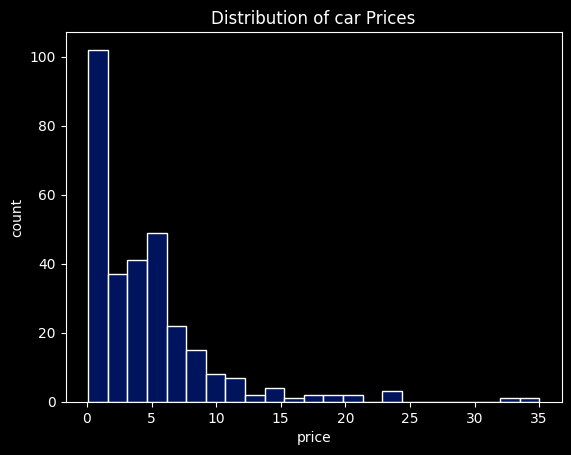

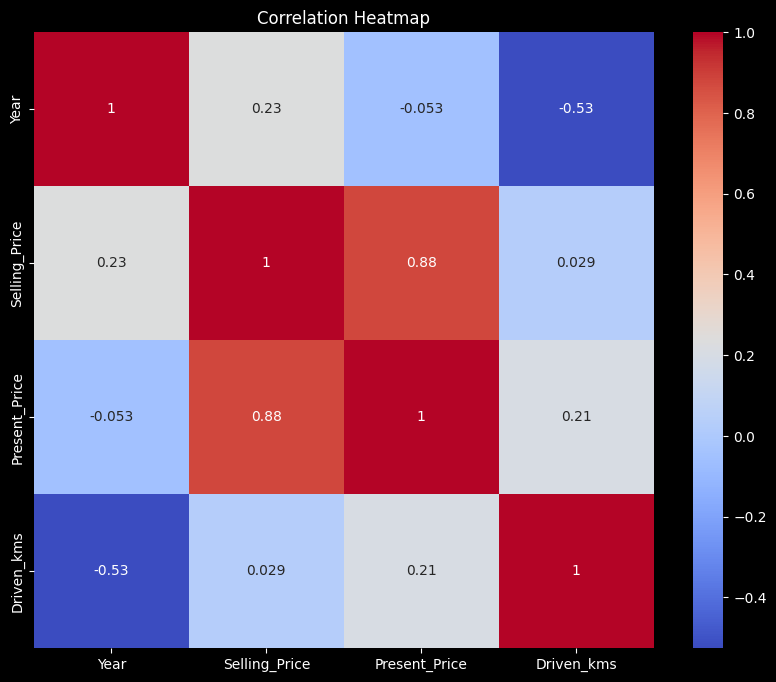

In [31]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['Selling_Price'])
plt.title('Distribution of car Prices', color='white')
plt.xlabel('price', color='white')
plt.ylabel('count',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


# Correlation Heatmap
numeric_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [18]:
feature_cols =['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
target_col = 'Selling_Price'
x = data[feature_cols]
y = data[target_col]

In [21]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
for col in x.columns:
  if x[col].dtype =='object':
    x[col] = label_encoder.fit_transform(x[col])

splitting data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

fitting the model

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

evaluating the model

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)

mse = mean_squared_error(y_test,predictions)

rmse = np.sqrt(mse)
print("Root mean squared Error:", rmse)

Root mean squared Error: 2.583688081114548


Deployment and Prediction

In [27]:
# Example new car data with the same features as the training data
# feature_cols =['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
# Ensure the order of values in new_car_data matches the order of features_cols
new_car_data = [[2022, 15.0, 10000, 2, 0, 1, 0]] # Example data: Year, Present_Price, Driven_kms, Fuel_Type (encoded), Selling_type (encoded), Transmission (encoded), Owner

features_cols = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


new_car_df = pd.DataFrame(new_car_data, columns=features_cols)

# The categorical features in the new data need to be encoded the same way as the training data.
# Since the training data used LabelEncoder, we need to apply that here.
# However, without the original label_encoder object, we'll assume the encoding for the example data.
# For a real deployment, you would save and load the fitted LabelEncoders or use OneHotEncoder during training.

# Assuming Fuel_Type: Petrol=2, Diesel=1, CNG=0
# Assuming Selling_type: Dealer=0, Individual=1
# Assuming Transmission: Manual=1, Automatic=0

# new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)

# replace 'x_train with your actual training data columns
# new_car_encoded = new_car_encoded.reindex(columns=x_train.columns, fill_value=0)


predicted_price = model.predict(new_car_df)
predicted_price_positive = abs(predicted_price)

print("Predicted Price:", predicted_price_positive)

Predicted Price: [10.99526695]
